# Flights-Delay-Prediction

To Make Flight Delay Prediction Model.

## Importing Required python Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Collection

In [50]:
flights = pd.read_csv("C:/Users/Ujjwal/Downloads/flights.csv")

In [106]:
flights

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_TYPE,RESULT
0,1,1,5,-11.0,169.0,430,-22.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
1,1,1,10,-8.0,263.0,750,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
2,1,1,20,-2.0,266.0,806,5.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
3,1,1,20,-5.0,258.0,805,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
4,1,1,25,-1.0,199.0,320,-21.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1,7,1107,6.0,81.0,1157,-4.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
99995,1,7,1108,-6.0,40.0,1219,-11.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
99996,1,7,1108,9.0,248.0,1842,2.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
99997,1,7,1108,-7.0,59.0,1225,7.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0


In [107]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                99999 non-null  int64  
 1   DAY                  99999 non-null  int64  
 2   SCHEDULED_DEPARTURE  99999 non-null  int64  
 3   DEPARTURE_DELAY      99999 non-null  float64
 4   AIR_TIME             99999 non-null  float64
 5   SCHEDULED_ARRIVAL    99999 non-null  int64  
 6   ARRIVAL_DELAY        99999 non-null  float64
 7   DIVERTED             99999 non-null  int64  
 8   CANCELLED            99999 non-null  int64  
 9   AIR_SYSTEM_DELAY     99999 non-null  float64
 10  SECURITY_DELAY       99999 non-null  float64
 11  AIRLINE_DELAY        99999 non-null  float64
 12  LATE_AIRCRAFT_DELAY  99999 non-null  float64
 13  WEATHER_DELAY        99999 non-null  float64
 14  DELAY_TYPE           99999 non-null  int64  
 15  RESULT               99999 non-null 

In [33]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,97701.000000,97701.000000,97628.000000,97628.000000,...,99999.000000,97559.000000,97386.000000,99999.000000,99999.000000,34625.000000,34625.000000,34625.000000,34625.000000,34625.000000
mean,2015.0,1.0,3.733887,4.107321,2240.849648,1306.350254,1326.267930,19.938046,17.155908,1348.428514,...,1481.118231,1458.032442,18.342575,0.002240,0.023890,14.026801,0.070787,17.853921,26.014556,2.751971
std,0.0,0.0,1.815522,2.098459,1818.708843,482.327514,503.511173,45.843719,10.738428,504.144849,...,498.918169,538.213952,48.878412,0.047276,0.152708,25.965405,1.692526,43.527539,42.593343,17.265760
min,2015.0,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,...,1.000000,1.000000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,2.000000,2.000000,759.000000,904.000000,911.000000,-3.000000,11.000000,928.000000,...,1100.000000,1050.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,4.000000,4.000000,1693.000000,1300.000000,1317.000000,3.000000,14.000000,1330.000000,...,1500.000000,1455.000000,4.000000,0.000000,0.000000,4.000000,0.000000,4.000000,10.000000,0.000000
75%,2015.0,1.0,5.000000,6.000000,3394.000000,1720.000000,1739.000000,25.000000,20.000000,1753.000000,...,1908.000000,1911.000000,27.000000,0.000000,0.000000,19.000000,0.000000,19.000000,35.000000,0.000000
max,2015.0,1.0,7.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,2359.000000,2400.000000,1384.000000,1.000000,1.000000,590.000000,107.000000,1380.000000,891.000000,562.000000


Text(0, 0.5, 'Number of flights')

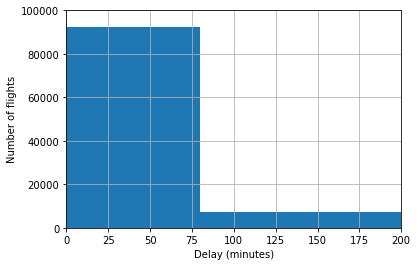

In [99]:
fig, ax = plt.subplots()
flights['ARRIVAL_DELAY'].hist(ax=ax, bins=10)

plt.xlim(0, 200)
plt.ylim(0, 100000)

plt.xlabel('Delay (minutes)')
plt.ylabel('Number of flights')

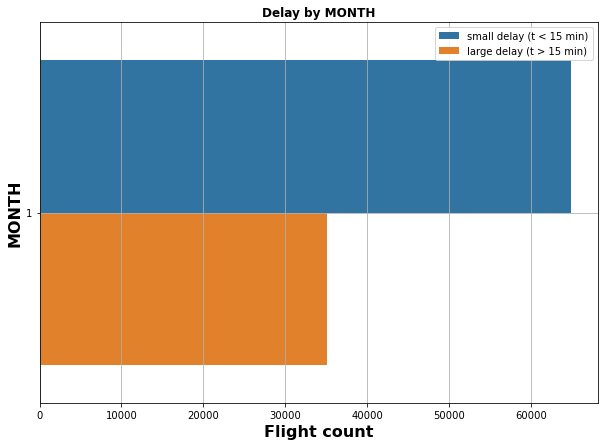

In [121]:
def delay_by_attribute(attribute, figsize=(10, 7)):
    
    delay_type = lambda x: 0 if x < 15 else 1
    flights['DELAY_TYPE'] = flights['DEPARTURE_DELAY'].apply(delay_type)
    
    plt.figure(figsize=figsize)
    ax = sns.countplot(y=attribute, hue='DELAY_TYPE', data=flights)
    
    plt.xlabel('Flight count', fontsize=16, weight='bold')
    plt.ylabel(attribute, fontsize=16, weight='bold')
    plt.title(f'Delay by {attribute}', weight='bold')
    
    L = plt.legend()
    L.get_texts()[0].set_text('small delay (t < 15 min)')
    L.get_texts()[1].set_text('large delay (t > 15 min)')
    plt.grid(True)

delay_by_attribute('MONTH')

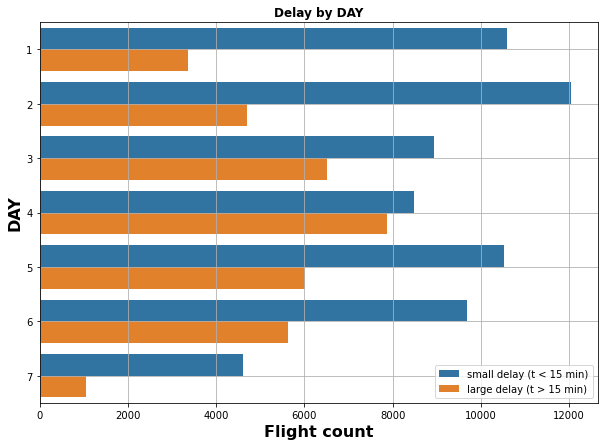

In [120]:
delay_by_attribute('DAY')

In [10]:
flights['DIVERTED'].value_counts()

0    99775
1      224
Name: DIVERTED, dtype: int64

## Data Cleaning & Filling

In [54]:
flights.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','ARRIVAL_TIME','CANCELLATION_REASON'],axis=1,inplace=True)

In [55]:
flights.fillna(flights.mean(),inplace=True)

In [56]:
flights=flights.drop_duplicates()

In [60]:
flights.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
AIR_TIME               0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
DELAY_TYPE             0
dtype: int64

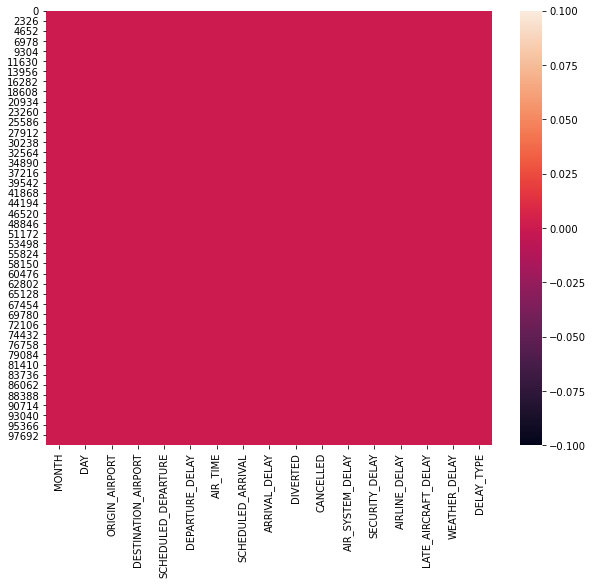

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(flights.isnull())

In [134]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                99999 non-null  int64  
 1   DAY                  99999 non-null  int64  
 2   ORIGIN_AIRPORT       99999 non-null  object 
 3   DESTINATION_AIRPORT  99999 non-null  object 
 4   SCHEDULED_DEPARTURE  99999 non-null  int64  
 5   DEPARTURE_DELAY      99999 non-null  float64
 6   AIR_TIME             99999 non-null  float64
 7   SCHEDULED_ARRIVAL    99999 non-null  int64  
 8   ARRIVAL_DELAY        99999 non-null  float64
 9   DIVERTED             99999 non-null  int64  
 10  CANCELLED            99999 non-null  int64  
 11  AIR_SYSTEM_DELAY     99999 non-null  float64
 12  SECURITY_DELAY       99999 non-null  float64
 13  AIRLINE_DELAY        99999 non-null  float64
 14  LATE_AIRCRAFT_DELAY  99999 non-null  float64
 15  WEATHER_DELAY        99999 non-null 

## Exploratory Data Analysis

In [63]:
flights.corr()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_TYPE
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,1.000000,-0.138124,0.059372,-3.583626e-02,-0.110813,6.985227e-02,4.847920e-03,-5.996874e-03,5.123179e-02,-5.532429e-03,-8.404666e-04,1.741757e-02,3.249248e-02,0.043209
SCHEDULED_DEPARTURE,NaN,-0.138124,1.000000,0.172143,-1.183048e-02,0.731239,1.527964e-01,2.514481e-03,-2.631739e-03,-6.301952e-02,-1.006874e-02,-3.051324e-02,1.044521e-01,-2.355221e-02,0.249203
DEPARTURE_DELAY,NaN,0.059372,0.172143,1.000000,2.715462e-03,0.153286,9.468888e-01,2.078627e-02,6.093710e-03,6.953257e-02,6.515895e-03,4.919108e-01,4.905614e-01,1.705218e-01,0.614557
AIR_TIME,NaN,-0.035836,-0.011830,0.002715,1.000000e+00,0.040786,-2.747451e-03,3.039896e-17,2.246452e-16,4.301571e-02,6.200966e-03,1.332146e-02,-5.722170e-02,-3.908468e-03,-0.000973
SCHEDULED_ARRIVAL,NaN,-0.110813,0.731239,0.153286,4.078558e-02,1.000000,1.386002e-01,5.991802e-03,-1.313191e-02,-3.787218e-02,-4.859420e-03,-2.963511e-02,8.601490e-02,-2.581266e-02,0.217071
ARRIVAL_DELAY,NaN,0.069852,0.152796,0.946889,-2.747451e-03,0.138600,1.000000e+00,8.161726e-16,-2.882619e-16,1.933494e-01,4.518918e-03,4.412849e-01,4.265717e-01,1.756343e-01,0.583662
DIVERTED,NaN,0.004848,0.002514,0.020786,3.039896e-17,0.005992,8.161726e-16,1.000000e+00,-7.412660e-03,-1.376334e-15,1.840322e-17,-1.644752e-16,-5.221617e-16,-8.928735e-16,0.015205
CANCELLED,NaN,-0.005997,-0.002632,0.006094,2.246452e-16,-0.013132,-2.882619e-16,-7.412660e-03,1.000000e+00,4.558671e-15,-4.232270e-16,-5.259020e-16,-3.289914e-15,3.890049e-15,0.208350
AIR_SYSTEM_DELAY,NaN,0.051232,-0.063020,0.069533,4.301571e-02,-0.037872,1.933494e-01,-1.376334e-15,4.558671e-15,1.000000e+00,-1.462166e-02,-1.060869e-01,-1.364108e-01,1.950676e-02,-0.087592


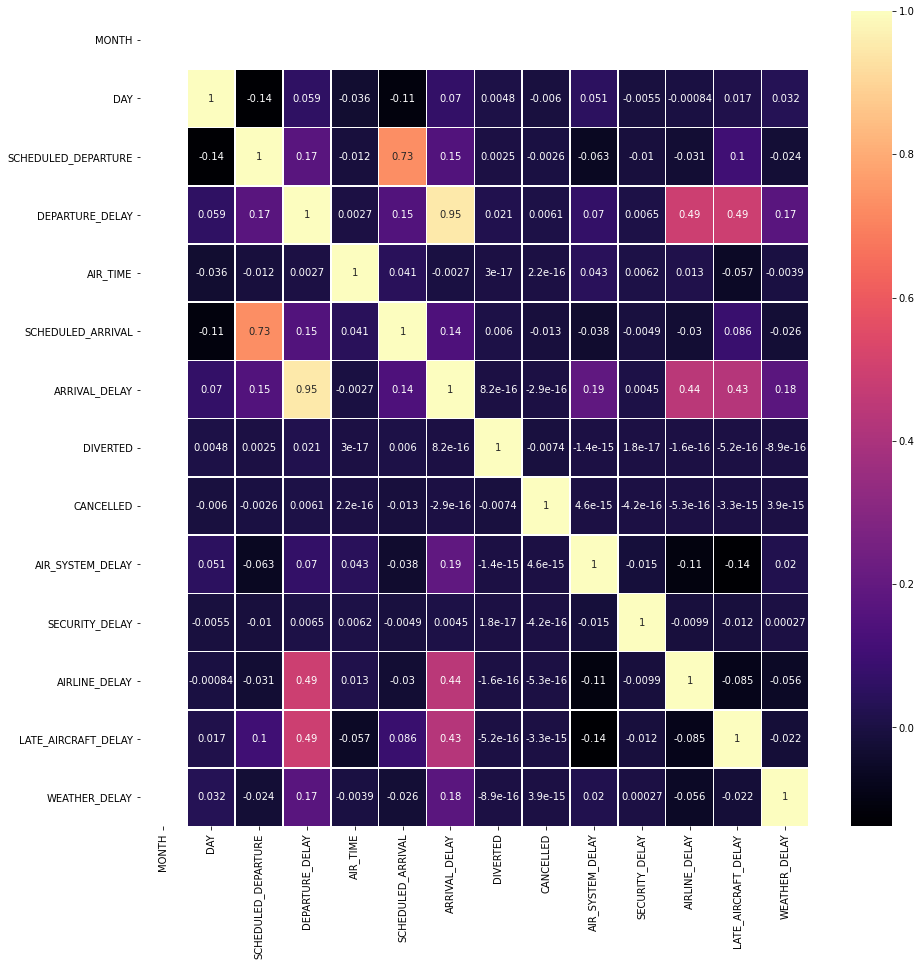

In [139]:
from matplotlib import rcParams
rcParams["figure.figsize"]=[15,15]
sns.heatmap(flights.corr(), annot=True, cmap='magma', linecolor='white', linewidths=0.5)

In [64]:
flights['RESULT']=flights['ARRIVAL_DELAY'].apply(lambda x: 1 if x>15 else 0)

In [65]:
flights['RESULT'].value_counts()

0    63778
1    36221
Name: RESULT, dtype: int64

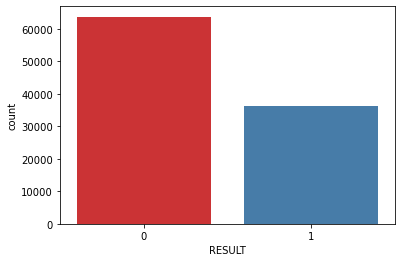

In [117]:
plt.figure(figsize=(6,4))
sns.countplot(x='RESULT',data= flights,palette='Set1')

## Setting the Data

In [73]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                99999 non-null  int64  
 1   DAY                  99999 non-null  int64  
 2   SCHEDULED_DEPARTURE  99999 non-null  int64  
 3   DEPARTURE_DELAY      99999 non-null  float64
 4   AIR_TIME             99999 non-null  float64
 5   SCHEDULED_ARRIVAL    99999 non-null  int64  
 6   ARRIVAL_DELAY        99999 non-null  float64
 7   DIVERTED             99999 non-null  int64  
 8   CANCELLED            99999 non-null  int64  
 9   AIR_SYSTEM_DELAY     99999 non-null  float64
 10  SECURITY_DELAY       99999 non-null  float64
 11  AIRLINE_DELAY        99999 non-null  float64
 12  LATE_AIRCRAFT_DELAY  99999 non-null  float64
 13  WEATHER_DELAY        99999 non-null  float64
 14  DELAY_TYPE           99999 non-null  int64  
 15  RESULT               99999 non-null 

In [76]:
flights

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_TYPE,RESULT
0,1,1,5,-11.0,169.0,430,-22.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
1,1,1,10,-8.0,263.0,750,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
2,1,1,20,-2.0,266.0,806,5.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
3,1,1,20,-5.0,258.0,805,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
4,1,1,25,-1.0,199.0,320,-21.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1,7,1107,6.0,81.0,1157,-4.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
99995,1,7,1108,-6.0,40.0,1219,-11.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
99996,1,7,1108,9.0,248.0,1842,2.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0
99997,1,7,1108,-7.0,59.0,1225,7.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0,0


## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [77]:
X= flights.iloc[:,:-1]

In [78]:
Y=flights['RESULT']

In [79]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.3, random_state= 42)

## Training a Decision Tree Model

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
clf = DecisionTreeClassifier()

In [82]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [83]:
Predictions = clf.predict(X_test)

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
print(classification_report(Y_test,Predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19043
           1       1.00      1.00      1.00     10957

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [123]:
print(confusion_matrix(Y_test,Predictions))

[[19022    21]
 [   45 10912]]


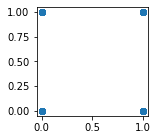

In [155]:
plt.figure(figsize=(2,2))
plt.scatter(Y_test,Predictions)

C:\Users\Ujjwal\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


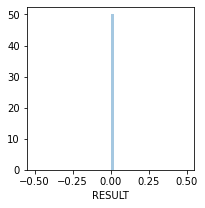

In [86]:
plt.figure(figsize=(3,3))
sns.distplot(Y_test-Predictions)

C:\Users\Ujjwal\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Residuals Distribution')

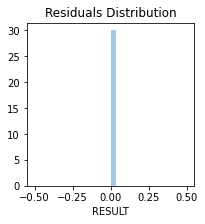

In [89]:
plt.figure(figsize=(3,3))
sns.distplot(Y_test-Predictions, bins= 30)
plt.title('Residuals Distribution')

# Accuracy

Accuracy =(TP+TN)/ Total Number of Observation

Accuracy= (19022+10912)/30000
        = 99.78%